🌳 Day 16: Decision Trees (Classification & Regression)
📌 1. Introduction

What is a Decision Tree?

Key concepts:

Nodes, Branches, Leaves

Gini Impurity, Entropy, Information Gain

Overfitting & Depth Control

In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error


In [3]:
# 🧪 3. Decision Tree for Classification (Example: Titanic Dataset)

# Load dataset
df = sns.load_dataset("titanic").dropna(subset=['age','sex','class','survived'])

# Features & Target
X = df[['age','sex','class']]
y = df['survived']

# Encoding categorical vars
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



Accuracy: 0.7482517482517482
              precision    recall  f1-score   support

           0       0.77      0.84      0.80        87
           1       0.71      0.61      0.65        56

    accuracy                           0.75       143
   macro avg       0.74      0.72      0.73       143
weighted avg       0.74      0.75      0.74       143



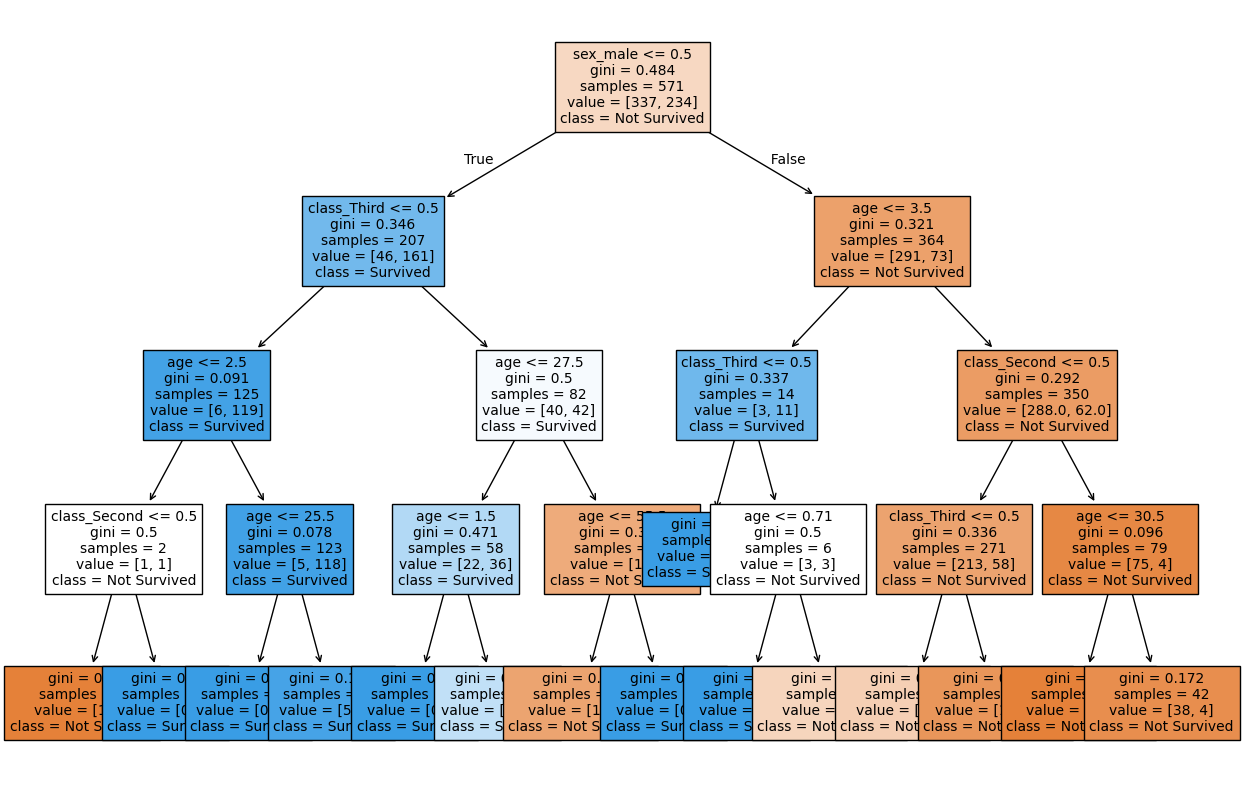

In [4]:
# 🌲 4. Visualize the Tree

plt.figure(figsize=(15,10))
plot_tree(clf, feature_names=X.columns, class_names=['Not Survived','Survived'], filled=True, fontsize=10)
plt.show()


In [5]:
# 📈 5. Decision Tree for Regression (Example: Boston Housing / Synthetic Data)

from sklearn.datasets import fetch_california_housing

# Load dataset
housing = fetch_california_housing(as_frame=True)
X = housing.data[['MedInc']]  # Use only Median Income
y = housing.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
reg = DecisionTreeRegressor(max_depth=4, random_state=42)
reg.fit(X_train, y_train)

# Predictions
y_pred = reg.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))


MSE: 0.6963254712305479


🎨 6. Plot Regression Tree Predictions

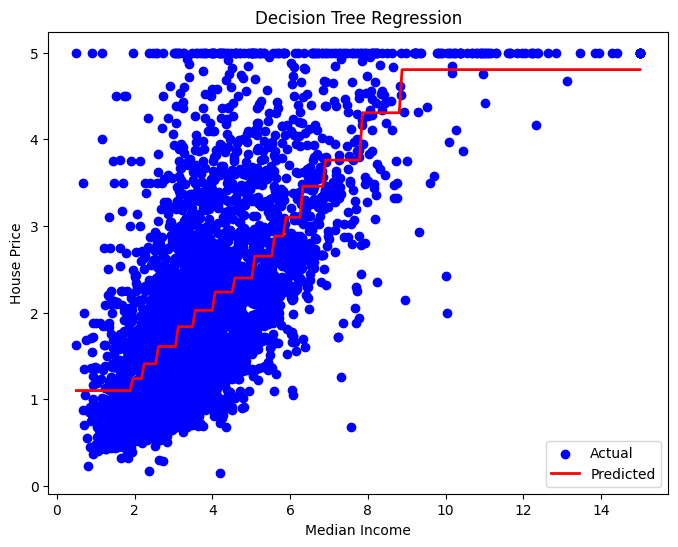

In [7]:
# Generate grid for smooth curve
X_grid = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)

# Wrap in DataFrame with same column name as training
X_grid_df = pd.DataFrame(X_grid, columns=['MedInc'])

# Predict using the model
y_grid_pred = reg.predict(X_grid_df)

# Plotting
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color='blue', label="Actual")
plt.plot(X_grid, y_grid_pred, color='red', linewidth=2, label="Predicted")
plt.xlabel("Median Income")
plt.ylabel("House Price")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()


📌 7. Key Takeaways

Easy to interpret but prone to overfitting

Use max_depth, min_samples_split, pruning to control complexity

Basis for Random Forests and Gradient Boosting